In [1]:
!pip install category_encoders
!pip install eli5 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 30.3 MB/s 
     |████████████████████████████████| 133 kB 77.5 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=fb4a7cfcc8413494bdefd25692cbd30de4cb7a5678774b5185794a80a6fbb8df
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import eli5

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import roc_auc_score
from eli5.sklearn import PermutationImportance
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
import warnings
from xgboost import XGBClassifier

In [3]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [4]:
df = pd.read_csv('data.csv')

In [5]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [7]:
df_clean = df.drop_duplicates()

In [8]:
pd.set_option('display.max_columns', None)
df_clean

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [9]:
def analysis_on_features(df):

    eda_results = pd.DataFrame()

    eda_results['null_count'] = df.isnull().sum()
    eda_results["num_unique_values"] = df.nunique()
    duplicated_rows = df.duplicated().sum()
    


    return eda_results, duplicated_rows

In [10]:
train_results, train_duplicated_rows = analysis_on_features(df_clean)
train_results, train_duplicated_rows

(                         null_count  num_unique_values
 id                                0                569
 diagnosis                         0                  2
 radius_mean                       0                456
 texture_mean                      0                479
 perimeter_mean                    0                522
 area_mean                         0                539
 smoothness_mean                   0                474
 compactness_mean                  0                537
 concavity_mean                    0                537
 concave points_mean               0                542
 symmetry_mean                     0                432
 fractal_dimension_mean            0                499
 radius_se                         0                540
 texture_se                        0                519
 perimeter_se                      0                533
 area_se                           0                528
 smoothness_se                     0            

In [11]:
#target_2는 종양이 악성인지 양성인지 확인하기 위해 조직검사 전에 선별할 수 있도록 하는 용도
#image_classification이 따라준다면 신뢰도 상승 예상
#f1_score로 측정하여 recall값을 높이는 방향으로 간다
#먼저 diagnosis labelencoding
df_clean=df_clean.drop(columns=['Unnamed: 32','id'])

In [12]:
target='diagnosis'
le = LabelEncoder()
df_clean[target]= le.fit_transform(df_clean['diagnosis'])

In [13]:
train, test = train_test_split(df_clean, test_size=0.3)
X_train, y_train = train.drop(columns=target), train[target]
X_test, y_test = test.drop(columns=target), test[target]

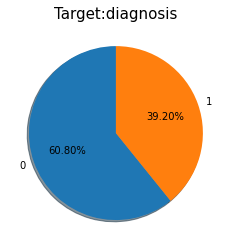

In [14]:
def analysis_on_target(df,a):


    n_zero_label= len(df[df[a]==0])
    n_one_label= len(df[df[a]==1])



    plt.pie(
        (n_zero_label, n_one_label),
        labels=(0, 1),        
        autopct="%.2f%%",
        shadow=True,
        startangle=90,
    )
    plt.title("Target:"+a, size=15)
    plt.show()

    return n_zero_label, n_one_label
train_label_count = analysis_on_target(train, 'diagnosis')

In [25]:
#작은 데이터양이기 때문에 val은 만들지 x
#f1_score로 할 예정=> 이미 종양이 있는 상태, 확실하게 악성이 맞는 사람들을 잡아내는 것 중요하다고 판단.
#기본적으로 binary logistic이기 때문에 logistic 분석, xgbclassifier, randomforest 통해서 측정 & 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
179,12.81,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.01330,0.1466,0.06133,0.2889,0.9899,1.778,21.79,0.008534,0.006364,0.00618,0.007408,0.01065,0.003351,13.63,16.15,86.70,570.7,0.1162,0.05445,0.02758,0.03990,0.1783,0.07319
266,10.60,18.95,69.28,346.4,0.09688,0.11470,0.063870,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.25150,0.19160,0.07926,0.2940,0.07587
508,16.30,15.70,104.70,819.8,0.09427,0.06712,0.055260,0.04563,0.1711,0.05657,0.2067,0.4706,1.146,20.67,0.007394,0.012030,0.02470,0.014310,0.01344,0.002569,17.32,17.76,109.80,928.2,0.1354,0.13610,0.19470,0.13570,0.2300,0.07230
494,13.16,20.54,84.06,538.7,0.07335,0.05275,0.018000,0.01256,0.1713,0.05888,0.3237,1.4730,2.326,26.07,0.007802,0.020520,0.01341,0.005564,0.02086,0.002701,14.50,28.46,95.29,648.3,0.1118,0.16460,0.07698,0.04195,0.2687,0.07429
89,14.64,15.24,95.77,651.9,0.11320,0.13390,0.099660,0.07064,0.2116,0.06346,0.5115,0.7372,3.814,42.76,0.005508,0.044120,0.04436,0.016230,0.02427,0.004841,16.34,18.24,109.40,803.6,0.1277,0.30890,0.26040,0.13970,0.3151,0.08473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,12.86,13.32,82.82,504.8,0.11340,0.08834,0.038000,0.03400,0.1543,0.06476,0.2212,1.0420,1.614,16.57,0.005910,0.020160,0.01902,0.010110,0.01202,0.003107,14.04,21.08,92.80,599.5,0.1547,0.22310,0.17910,0.11550,0.2382,0.08553
252,19.73,19.82,130.70,1206.0,0.10620,0.18490,0.241700,0.09740,0.1733,0.06697,0.7661,0.7800,4.115,92.81,0.008482,0.050570,0.06800,0.019710,0.01467,0.007259,25.28,25.59,159.80,1933.0,0.1710,0.59550,0.84890,0.25070,0.2749,0.12970
170,12.32,12.39,78.85,464.1,0.10280,0.06981,0.039870,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.12660,0.12420,0.09391,0.2827,0.06771
214,14.19,23.81,92.87,610.7,0.09463,0.13060,0.111500,0.06462,0.2235,0.06433,0.4207,1.8450,3.534,31.00,0.010880,0.037100,0.03688,0.016270,0.04499,0.004768,16.86,34.85,115.00,811.3,0.1559,0.40590,0.37440,0.17720,0.4724,0.10260


In [15]:
base_major = y_train.mode()[0]
y_pred_base = [base_major] * len(y_train)

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print("training f1: ", f1_score(y_train, y_pred_base).round(2))

y_pred_base_test = [base_major] * len(y_test)
print("validation f1: ", f1_score(y_test, y_pred_base_test).round(2))

training f1:  0.0
validation f1:  0.0


In [17]:
logistic = LogisticRegression(class_weight='balanced')
logistic.fit(X_train, y_train)
y_test_pred = logistic.predict(X_test)
print('logistic train accuracy', logistic.score(X_train, y_train).round(2))
print("logistic test accuracy: ", f1_score(y_test, y_test_pred).round(2))

logistic train accuracy 0.95
logistic test accuracy:  0.93


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [18]:
print('회귀계수가 양수인 특성 상위 3개')
print(pd.Series(logistic.coef_[0], logistic.feature_names_in_).sort_values(ascending=False).head(3), '\n')
print('회귀계수가 음수인 특성 하위 3개')
print(pd.Series(logistic.coef_[0], logistic.feature_names_in_).sort_values(ascending=False).tail(3))

회귀계수가 양수인 특성 상위 3개
concavity_worst      0.509979
texture_worst        0.428784
compactness_worst    0.424103
dtype: float64 

회귀계수가 음수인 특성 하위 3개
perimeter_mean   -0.380851
radius_worst     -0.852804
radius_mean      -0.856885
dtype: float64


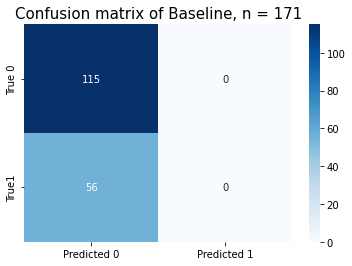

In [19]:
y_true0 = y_test.value_counts()[0]
y_true1 = y_test.value_counts()[1]
fn = len(y_pred_base_test) - y_true0
base = pd.DataFrame(index = ['True 0', 'True1'], data = {'Predicted 0':[y_true0, fn], 'Predicted 1':[0,0]})

fig, ax = plt.subplots()
sns.heatmap(base, cmap=plt.cm.Blues, annot=True,fmt="d")
plt.title(f'Confusion matrix of Baseline, n = {len(y_test)}', fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


XGBoostError: ignored

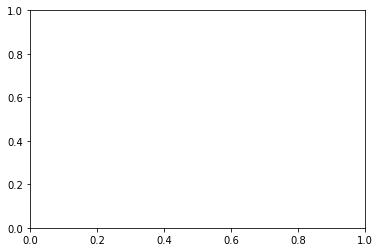

In [28]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(logistic, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix of Logistic Regression, n = {len(y_test)}', fontsize=15)
plt.show()

In [20]:
from sklearn.tree import DecisionTreeClassifier
Dic = DecisionTreeClassifier(random_state=42, criterion="entropy")

Dic.fit(X_train, y_train)
X_testing = Dic.predict(X_test)
print("훈련 정확도: ", Dic.score(X_train, y_train))
print("검증 정확도: ", f1_score(y_test,X_testing))

훈련 정확도:  1.0
검증 정확도:  0.8695652173913044


In [21]:
from sklearn.metrics import classification_report

y_pred = Dic.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       115
           1       0.85      0.89      0.87        56

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.90       171
weighted avg       0.91      0.91      0.91       171



NameError: ignored

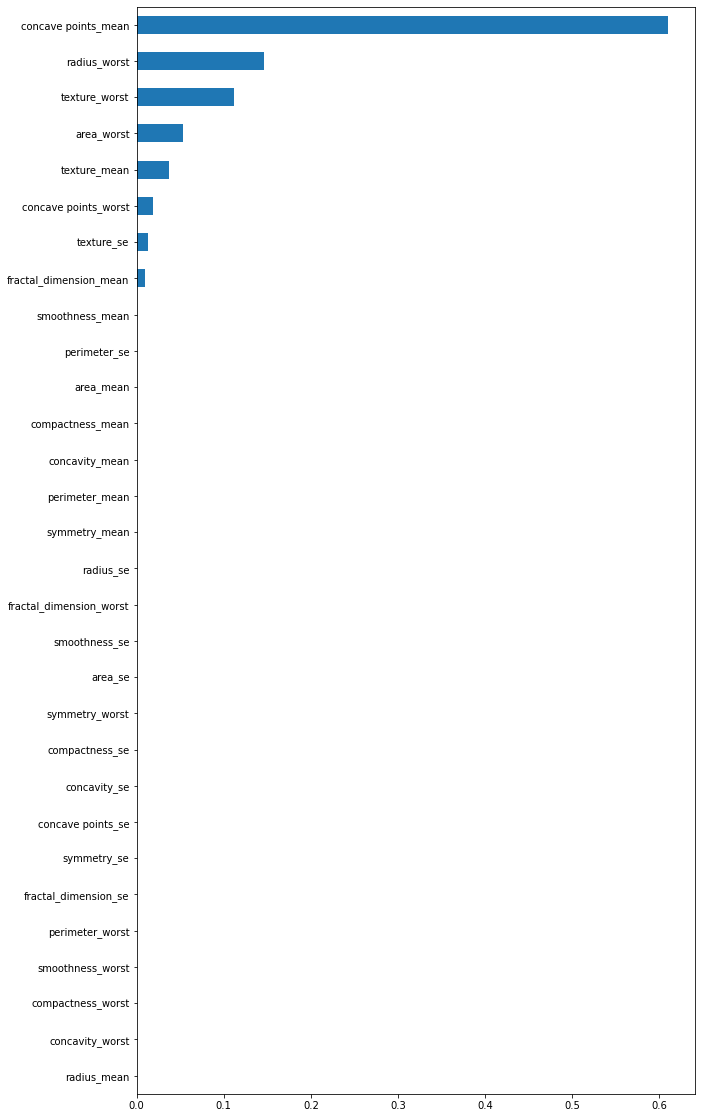

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

importances = pd.Series(Dic.feature_importances_, X_train.columns)
plt.figure(figsize=(10, 20))
importances.sort_values().plot.barh()

In [31]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = make_pipeline(
    RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1),
)

pipe_rf.fit(X_train, y_train)
x_test_prd=pipe_rf.predict(X_test)
print("훈련 정확도: ", pipe_rf.score(X_train, y_train))
print("검증 정확도: ", f1_score(y_test, x_test_prd))

훈련 정확도:  1.0
검증 정확도:  0.9357798165137615


In [27]:
xgbc= XGBClassifier( 
    objective="binary:logistic",
    eval_metric="error",
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    learning_rate=0.1,
    use_label_encoder=False,
)

In [45]:
params = {
    "xgbclassifier__max_depth": [2, 4, 6,8],
    "xgbclassifier__min_child_weight": [2, 4, 8],
    "xgbclassifier__colsample_bytree": [0.6, 0.8, 1.0],
}

In [46]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(xgbc, param_grid=params, scoring="f1", cv=3, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=2;, score=0.933 total time=   1.6s
[CV 2/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=2;, score=0.961 total time=   0.1s
[CV 3/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=2;, score=0.962 total time=   0.1s
[CV 1/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=4;, score=0.933 total time=   0.1s
[CV 2/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=4;, score=0.961 total time=   0.1s
[CV 3/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=4;, score=0.962 total time=   0.1s
[CV 1/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max

GridSearchCV(cv=3,
             estimator=XGBClassifier(eval_metric='error', n_estimators=200,
                                     n_jobs=-1, random_state=42,
                                     use_label_encoder=False),
             param_grid={'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
                         'xgbclassifier__max_depth': [2, 4, 6, 8],
                         'xgbclassifier__min_child_weight': [2, 4, 8]},
             scoring='f1', verbose=3)

In [47]:
print("최적 하이퍼파라미터: ", grid_search.best_params_)
print("최적 f1: ", grid_search.best_score_)

최적 하이퍼파라미터:  {'xgbclassifier__colsample_bytree': 0.6, 'xgbclassifier__max_depth': 2, 'xgbclassifier__min_child_weight': 2}
최적 f1:  0.9518853695324284


In [39]:
X_train_sel = X_train.drop(columns=['radius_mean', 'concavity_worst',])

In [48]:
from eli5.sklearn import PermutationImportance

def get_pipeline():
    return make_pipeline(
        RandomForestClassifier(
            n_estimators=100, random_state=42, class_weight="balanced"
        ),
    )
pipe = get_pipeline()
pipe.fit(X_train, y_train)

#permuter 정의
permuter = PermutationImportance(
    pipe.named_steps["randomforestclassifier"],
    scoring="f1", 
    n_iter=5, 
    random_state=42,
)

In [49]:
# 스코어를 다시 계산합니다.
pipe.fit(X_train, y_train)

permuter.fit(X_test, y_test)

PermutationImportance(estimator=RandomForestClassifier(class_weight='balanced',
                                                       random_state=42),
                      random_state=42, scoring='f1')

In [50]:
# 특성별 score을 확인합니다.
feature_names = X_test.columns.tolist()
eli5.show_weights(
    permuter,
    top=None,  # top n 지정 가능, None 일 경우 모든 특성
    feature_names=feature_names,  # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0117 ± 0.0237,concave points_worst
0.0064 ± 0.0173,area_worst
0.0016 ± 0.0203,concave points_mean
0 ± 0.0000,fractal_dimension_worst
0 ± 0.0000,symmetry_mean
0 ± 0.0000,texture_se
0 ± 0.0000,smoothness_se
0 ± 0.0000,compactness_worst
-0.0014 ± 0.0136,texture_worst
-0.0017 ± 0.0068,smoothness_mean
